Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


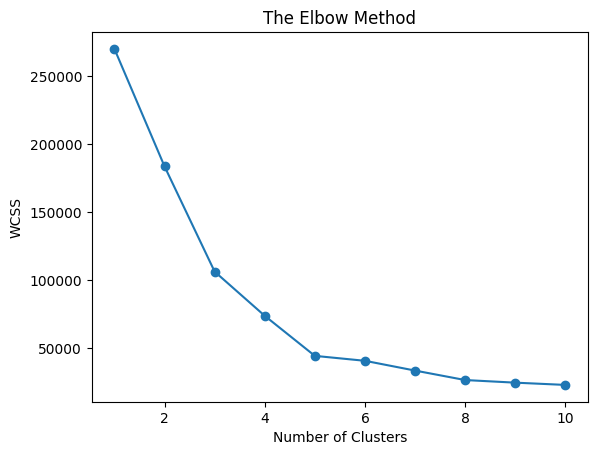

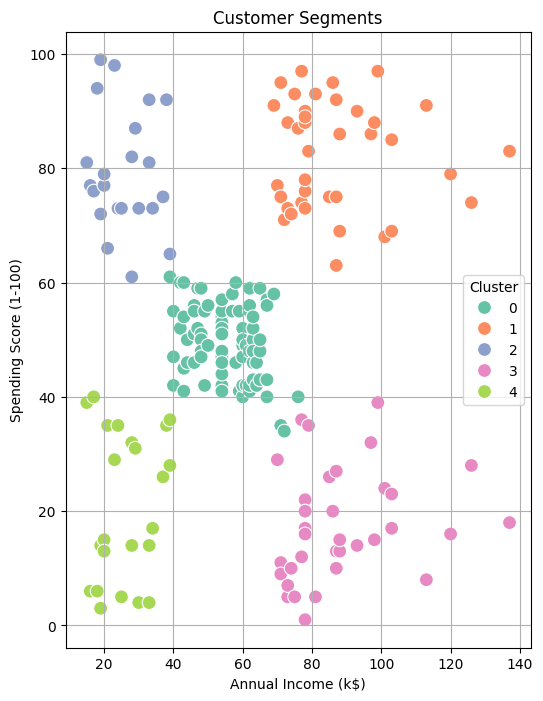

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
#Load Dataset
df=pd.read_csv('/content/Mall_Customers.csv')
df.drop(['CustomerID'],axis=1,inplace=True)
print(df.columns)
x=df[['Annual Income (k$)','Spending Score (1-100)']]
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_means=kmeans.fit_predict(x)
df['Cluster']=y_means
plt.figure(figsize=(6,8))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette='Set2',s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()